In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Define columns for the 2024-2025 file (lacks headers)
columns_24_25 = ["RANK","NAME","TEAM","CUR","POS","AGE","GP","MpG","USG%","TO%","FTA","FT%","2PA","2P%","3PA","3P%","eFG%","TS%","PpG","RpG","ApG","SpG","BpG","TOpG","P+R","P+A","P+R+A","VI","ORtg","DRtg"]

# Load 2024-2025 data 
df_24_25 = pd.read_csv("2024-2025 nba player stats.csv", sep='\t', names=columns_24_25, header=None)
df_24_25['Season'] = '2024-2025'

# Load 2025-2026 data 
df_25_26 = pd.read_csv("2025-2026 NBA Player Stats.csv")
df_25_26['Season'] = '2025-2026'

# Combine for initial inspection
df = pd.concat([df_24_25, df_25_26], ignore_index=True)

print("2024-2025 shape:", df_24_25.shape)
print("2025-2026 shape:", df_25_26.shape)
df.head()

2024-2025 shape: (158, 31)
2025-2026 shape: (150, 31)


,RANK,NAME,TEAM,CUR,POS,AGE,GP,MpG,USG%,TO%,...,SpG,BpG,TOpG,P+R,P+A,P+R+A,VI,ORtg,DRtg,Season
0,1.0,Shai Gilgeous-Alexander,Okc,*,G,26.8,76,34.2,34.8,9.9,...,1.7,1.0,2.4,37.7,39.1,44.1,11.9,128.8,106.0,2024-2025
1,2.0,Giannis Antetokounmpo,Mil,*,F,30.4,67,34.2,35.2,13.5,...,0.9,1.2,3.1,42.3,36.9,48.8,15.6,122.5,105.3,2024-2025
2,3.0,Nikola Jokic,Den,*,C,30.1,70,36.7,29.5,14.4,...,1.8,0.6,3.3,42.3,39.8,52.6,17.1,132.9,108.0,2024-2025
3,4.0,Luka Doncic,Lal,*,F-G,26.1,28,35.1,34.5,15.7,...,1.6,0.4,3.7,36.3,35.7,43.8,13.6,115.8,107.5,2024-2025
4,5.0,Luka Doncic,Dal,NaN,F-G,26.1,22,35.7,33.2,13.9,...,2.0,0.4,3.4,36.5,36.0,44.3,13.7,115.3,108.1,2024-2025


In [113]:
# Data Cleaning and Feature Engineering

# Identify numeric columns automatically or specify them
# We exclude metadata columns
non_numeric_cols = ['NAME', 'TEAM', 'CUR', 'POS', 'Season']
# Get all columns that are not in non_numeric_cols
numeric_cols = [c for c in df.columns if c not in non_numeric_cols]

# Convert to numeric, coercing errors to NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate per-game stats for totals if they are not already per game
# FTA, 2PA, 3PA seem to be totals in the files
df['FTA_per_game'] = df['FTA'] / df['GP']
df['2PA_per_game'] = df['2PA'] / df['GP']
df['3PA_per_game'] = df['3PA'] / df['GP']

# Handle missing values
# Fill NaNs with 0 (e.g. 0% shooting if 0 attempts, or missing stats)
df = df.fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RANK          308 non-null    float64
 1   NAME          308 non-null    object 
 2   TEAM          308 non-null    object 
 3   CUR           308 non-null    object 
 4   POS           308 non-null    object 
 5   AGE           308 non-null    float64
 6   GP            308 non-null    int64  
 7   MpG           308 non-null    float64
 8   USG%          308 non-null    float64
 9   TO%           308 non-null    float64
 10  FTA           308 non-null    int64  
 11  FT%           308 non-null    float64
 12  2PA           308 non-null    int64  
 13  2P%           308 non-null    float64
 14  3PA           308 non-null    int64  
 15  3P%           308 non-null    float64
 16  eFG%          308 non-null    float64
 17  TS%           308 non-null    float64
 18  PpG           308 non-null    

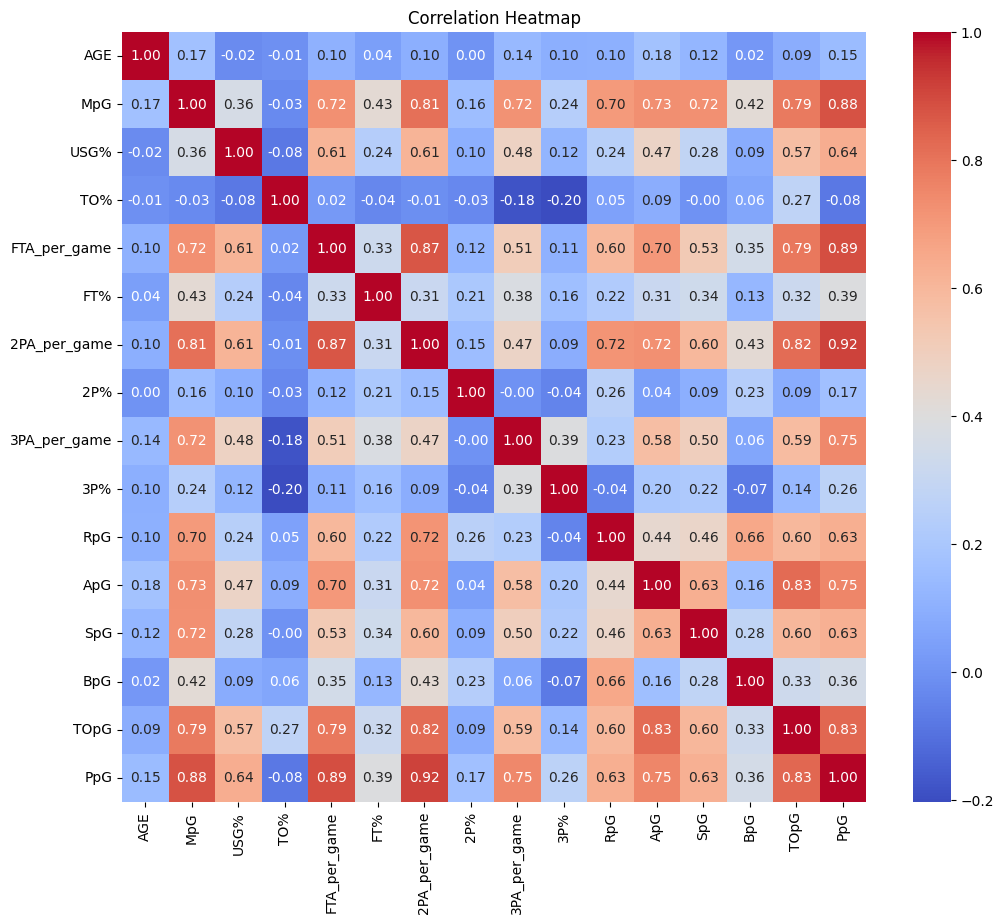

In [ ]:
# Select features for correlation analysis
correlation_cols = ['AGE', 'MpG', 'USG%', 'TO%', 'FTA_per_game', 'FT%', '2PA_per_game', '2P%', '3PA_per_game', '3P%', 'RpG', 'ApG', 'SpG', 'BpG', 'TOpG', 'PpG']

plt.figure(figsize=(12,10))
sns.heatmap(df[correlation_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Train xStats Models
models = {}
predictions = {}
metrics = {}

results_df = test_df[['NAME', 'TEAM'] + targets].copy()

for target in targets:
    X_train = train_df[x_features]
    y_train = train_df[target]
    X_test = test_df[x_features]
    y_test = test_df[target]
    
    # Train Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Store
    models[target] = model
    predictions[target] = y_pred
    results_df[f'x{target}'] = y_pred # Expected Stats
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics[target] = {'MSE': mse, 'R2': r2}
    
    print(f"--- x{target} Model ---")
    print(f"R² Score: {r2:.4f}")
    
    # Show Coefficients to verify "Opportunity + stat" logic
    coef_df = pd.DataFrame({'Feature': x_features, 'Coefficient': model.coef_})
    print("Top Predictors:")
    print(coef_df.sort_values(by='Coefficient', ascending=False).head(3))
    print("\n")

--- xPpG Model ---
R² Score: 0.9074
Top Predictors:
     Feature  Coefficient
6  eFG%_2024     3.019465
1       USG%     0.434896
0        MpG     0.415995


--- xRpG Model ---
R² Score: 0.9054
Top Predictors:
    Feature  Coefficient
8    L7_RpG     0.624095
3  RpG_2024     0.344834
9    L7_ApG     0.101465


--- xApG Model ---
R² Score: 0.8428
Top Predictors:
     Feature  Coefficient
9     L7_ApG     0.751074
4   ApG_2024     0.243507
6  eFG%_2024     0.061988




In [130]:
# Prepare Data with History (xStats Approach)
# Split back into seasons
df_24 = df[df['Season'] == '2024-2025'].copy()
df_25 = df[df['Season'] == '2025-2026'].copy()

# 1. Load Team Defensive Ratings from CSV
try:
    df_team_defense = pd.read_csv("nba team defense ratings.csv")
    df_team_defense.columns = df_team_defense.columns.str.strip()
    
    if 'DefRtg' in df_team_defense.columns and 'TEAM' in df_team_defense.columns:
        team_defense_ratings = dict(zip(df_team_defense['TEAM'], df_team_defense['DefRtg']))
        print("Loaded Team Defensive Ratings.")
    else:
        raise ValueError("Missing columns")
except Exception as e:
    print(f"Error loading Defense CSV: {e}")
    df_25['DRtg_Weighted'] = df_25['DRtg'] * df_25['MpG']
    team_stats = df_25.groupby('TEAM').agg({'DRtg_Weighted': 'sum', 'MpG': 'sum'}).reset_index()
    team_stats['Team_DRtg'] = team_stats['DRtg_Weighted'] / team_stats['MpG']
    team_defense_ratings = dict(zip(team_stats['TEAM'], team_stats['Team_DRtg']))

# 2. Load Last 7 Games Data (Recent Form)
try:
    df_l7 = pd.read_csv("nba_player_last_7_games.csv")
    
    # Aggregate to get averages
    l7_stats = df_l7.groupby('PlayerName').agg({
        'PTS': 'mean',
        'REB': 'mean',
        'AST': 'mean',
        'MIN': 'mean' # Optional, but good context
    }).reset_index()
    
    l7_stats.columns = ['NAME', 'L7_PpG', 'L7_RpG', 'L7_ApG', 'L7_MpG']
    print(f"Loaded Last 7 Games data for {len(l7_stats)} players.")
    
except Exception as e:
    print(f"Error loading Last 7 Games CSV: {e}")
    l7_stats = pd.DataFrame(columns=['NAME', 'L7_PpG', 'L7_RpG', 'L7_ApG', 'L7_MpG'])

# 3. Prepare History Features 
history_cols = ['PpG', 'RpG', 'ApG', 'TS%', 'eFG%']
df_24_subset = df_24[['NAME'] + history_cols].copy()
df_24_subset.columns = ['NAME'] + [f"{c}_2024" for c in history_cols]

# 4. Merge Everything into 2025 data
# Merge History
df_model = pd.merge(df_25, df_24_subset, on='NAME', how='left')
# Merge Recent Form
df_model = pd.merge(df_model, l7_stats, on='NAME', how='left')

# Handle Missing Values
df_model['L7_PpG'] = df_model['L7_PpG'].fillna(df_model['PpG'])
df_model['L7_RpG'] = df_model['L7_RpG'].fillna(df_model['RpG'])
df_model['L7_ApG'] = df_model['L7_ApG'].fillna(df_model['ApG'])
df_model = df_model.fillna(0)

# 5. Define Features and Targets
targets = ['PpG', 'RpG', 'ApG']

# Opportunity (Current Season)
opportunity_features = ['MpG', 'USG%']

# history (Past Season)
history_features = [f"{c}_2024" for c in history_cols]

# Recent Form stats (Last 7 Games)
recent_form_features = ['L7_PpG', 'L7_RpG', 'L7_ApG']

# Final Feature Set
x_features = opportunity_features +history_features + recent_form_features

# Split into Train/Test
train_df, test_df = train_test_split(df_model, test_size=0.2, random_state=42)

print(f"Training on {len(train_df)} samples using xStats + Recent Form")
print(f"Features: {x_features}")

Loaded Team Defensive Ratings.
Loaded Last 7 Games data for 148 players.
Training on 132 samples using xStats + Recent Form
Features: ['MpG', 'USG%', 'PpG_2024', 'RpG_2024', 'ApG_2024', 'TS%_2024', 'eFG%_2024', 'L7_PpG', 'L7_RpG', 'L7_ApG']


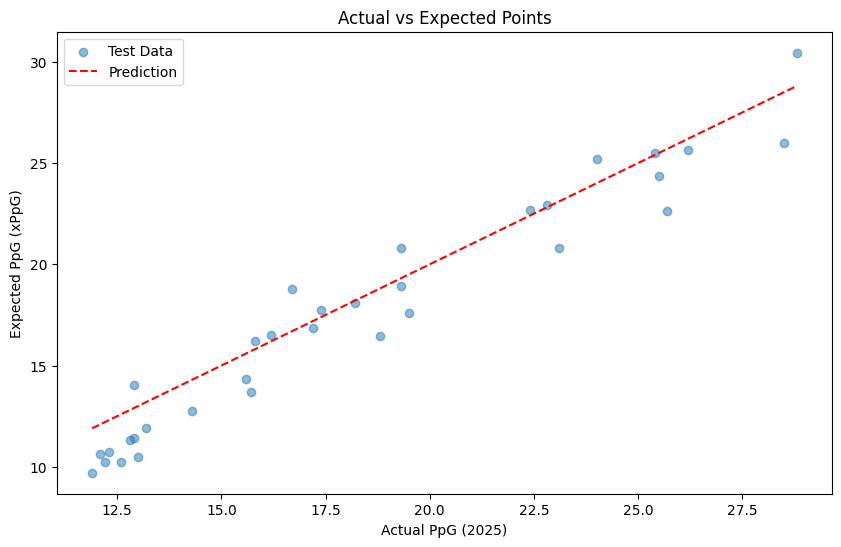

Top Players by xPpG (Expected Points):
                        NAME   PpG       xPpG
9               Jaylen Brown  28.8  30.443106
12             Austin Reaves  28.5  25.994910
15         Victor Wembanyama  26.2  25.630347
19             Kawhi Leonard  25.4  25.511388
24              De'Aaron Fox  24.0  25.178387
18               Deni Avdija  25.5  24.366414
30              Franz Wagner  22.8  22.928415
31             Miles Bridges  22.4  22.692623
16               Tyler Herro  25.7  22.619705
56  Nickeil Alexander-Walker  19.3  20.822762


In [129]:
# Visualize xPoints vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(results_df['PpG'], results_df['xPpG'], alpha=0.5, label='Test Data')
plt.plot([results_df['PpG'].min(), results_df['PpG'].max()], [results_df['PpG'].min(), results_df['PpG'].max()], 'r--', label='Prediction')
plt.xlabel("Actual PpG (2025)")
plt.ylabel("Expected PpG (xPpG)")
plt.title("Actual vs Expected Points")
plt.legend()
plt.show()

print("Top Players by xPpG (Expected Points):")
print(results_df.sort_values(by='xPpG', ascending=False).head(10)[['NAME', 'PpG', 'xPpG']])

In [ ]:
import joblib

# Save data and models for web app
model_data = {
    'models': models,
    'x_features': x_features,
    'df_model': df_model,
    'team_defense_ratings': team_defense_ratings
}

joblib.dump(model_data, 'nba_model_data.joblib')
print("Model, data, and team ratings saved to 'nba_model_data.joblib'")
print("Sample Team Ratings:", list(team_defense_ratings.items())[:3])

Model, data, and team ratings saved to 'nba_model_data.joblib'
Sample Team Ratings: [('Oklahoma City Thunder', 103.4), ('Houston Rockets', 110.3), ('Miami Heat', 110.9)]
